In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HousingData.csv")

In [3]:
# -Variables There are 14 attributes  the dataset. They are:

# CRIM - per capita crime rate by town

# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

# INDUS - proportion of non-retail business acres per town.

# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

# NOX - nitric oxides concentration (parts per 10 million)

# RM - average number of rooms per dwelling

# AGE - proportion of owner-occupied units built prior to 1940

# DIS - weighted distances to five Boston employment centres

# RAD - index of accessibility to radial highways

# TAX - full-value property-tax rate per 10,000

# PTRATIO - pupil-teacher ratio by town

# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

# LSTAT - per lower status of the population

# MEDV - Median value of owner-occupied homes in $1000's

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Cleaning

In [6]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
df[df.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [9]:
from sklearn.impute import KNNImputer

impute = KNNImputer()

for i in df.select_dtypes(include=["number"]):
    df[i] = impute.fit_transform(df[[i]])

In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# EDA

import matplotlib.pyplot as plt
import seaborn as sns

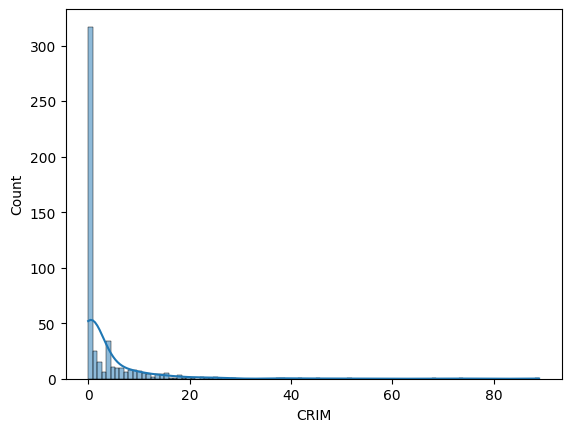

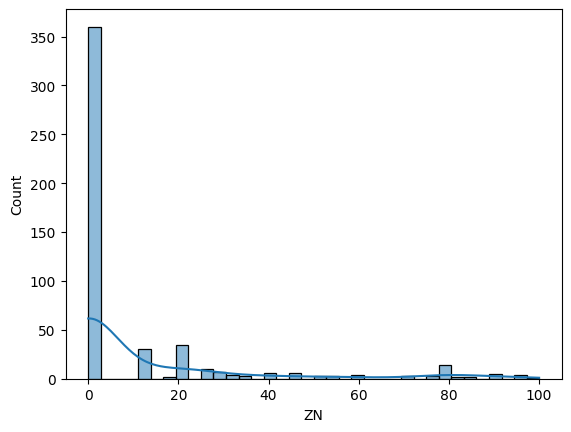

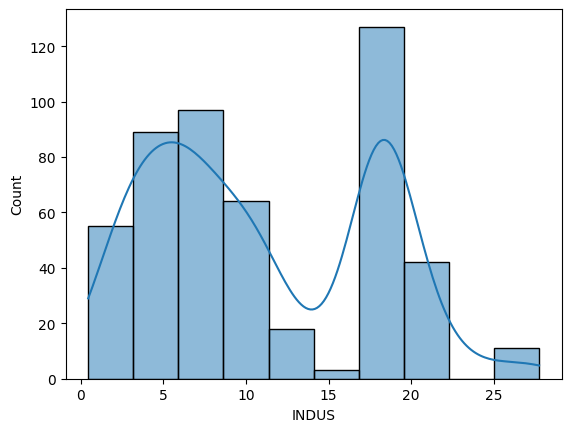

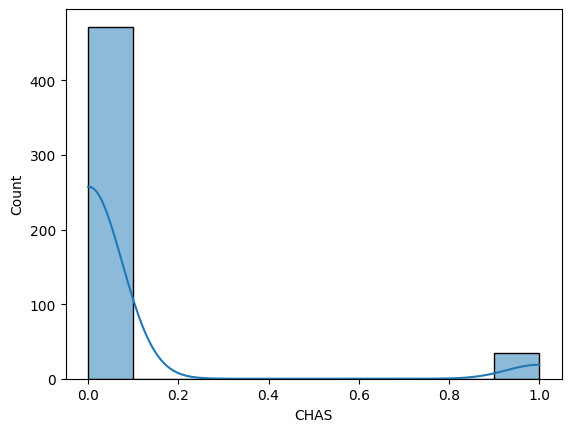

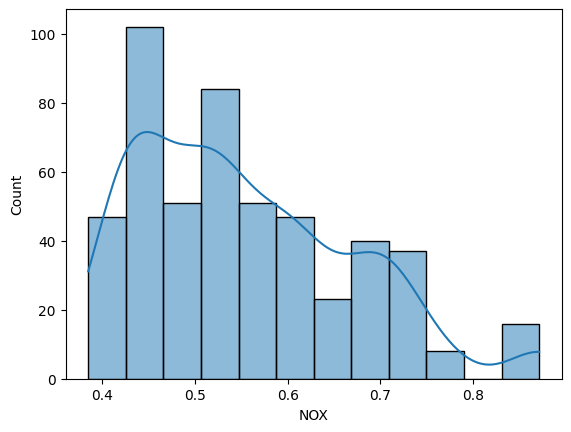

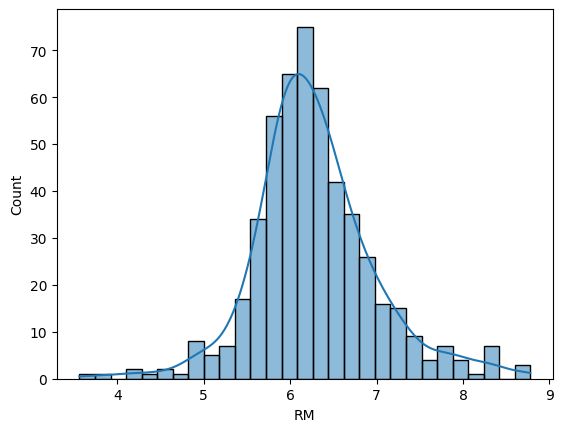

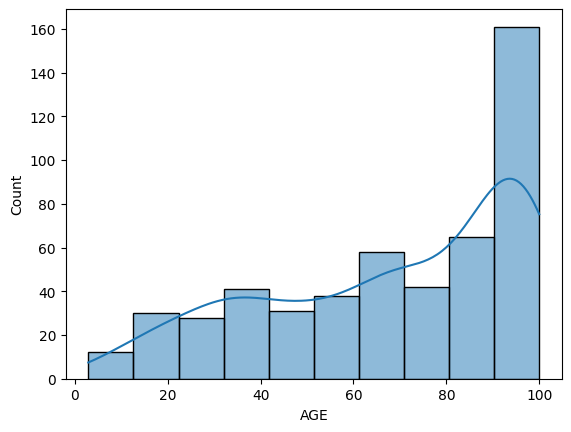

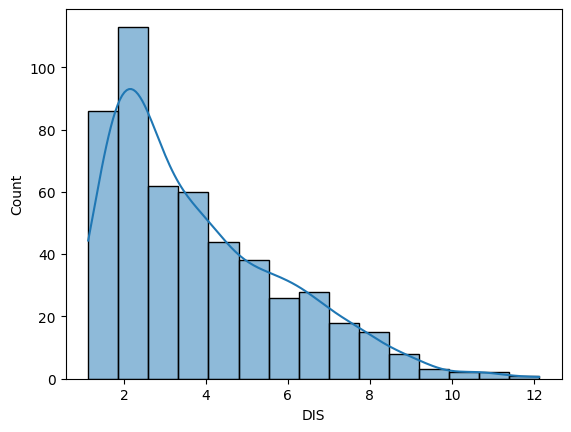

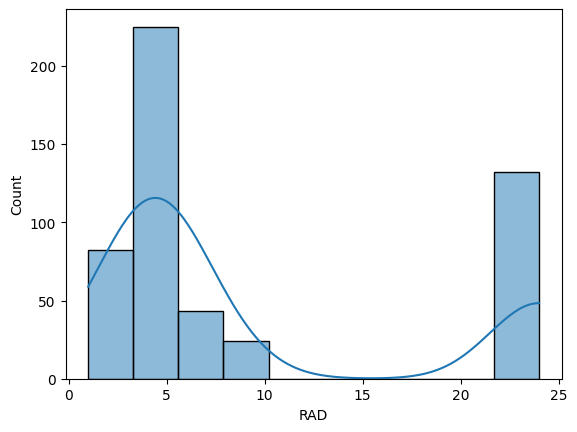

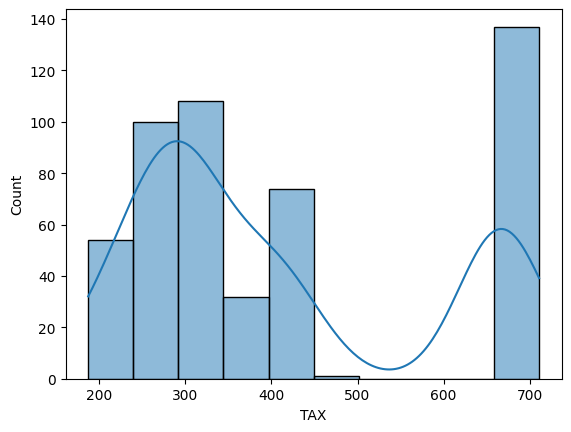

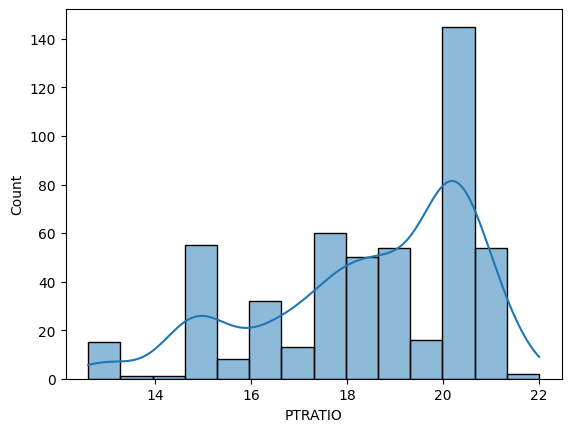

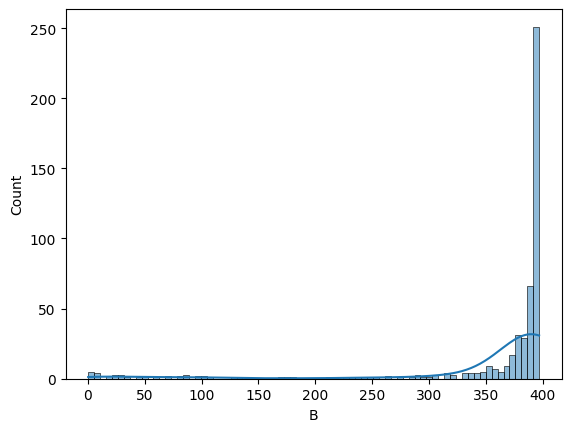

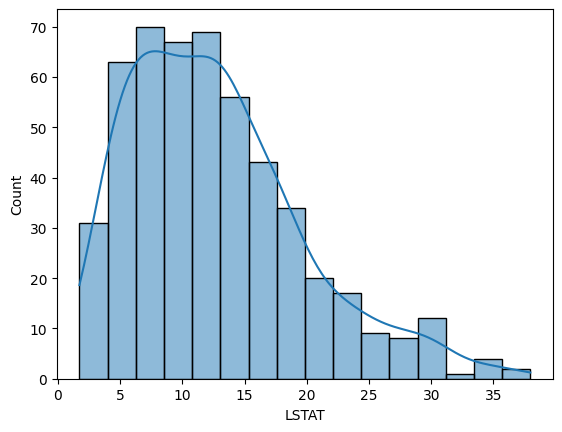

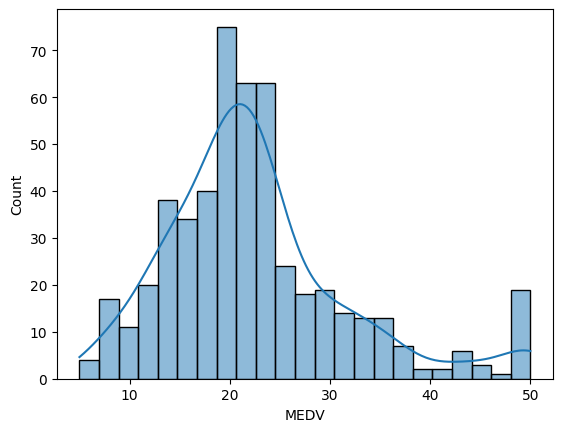

In [11]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i,kde=True)
    plt.show()
                

In [12]:
# Except RM and MEDV, nothing else is normally distributed, this might be an issue, as most statistical assumptions hold true only when our data is normally distributed.

In [13]:
correlation = df.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


<Axes: >

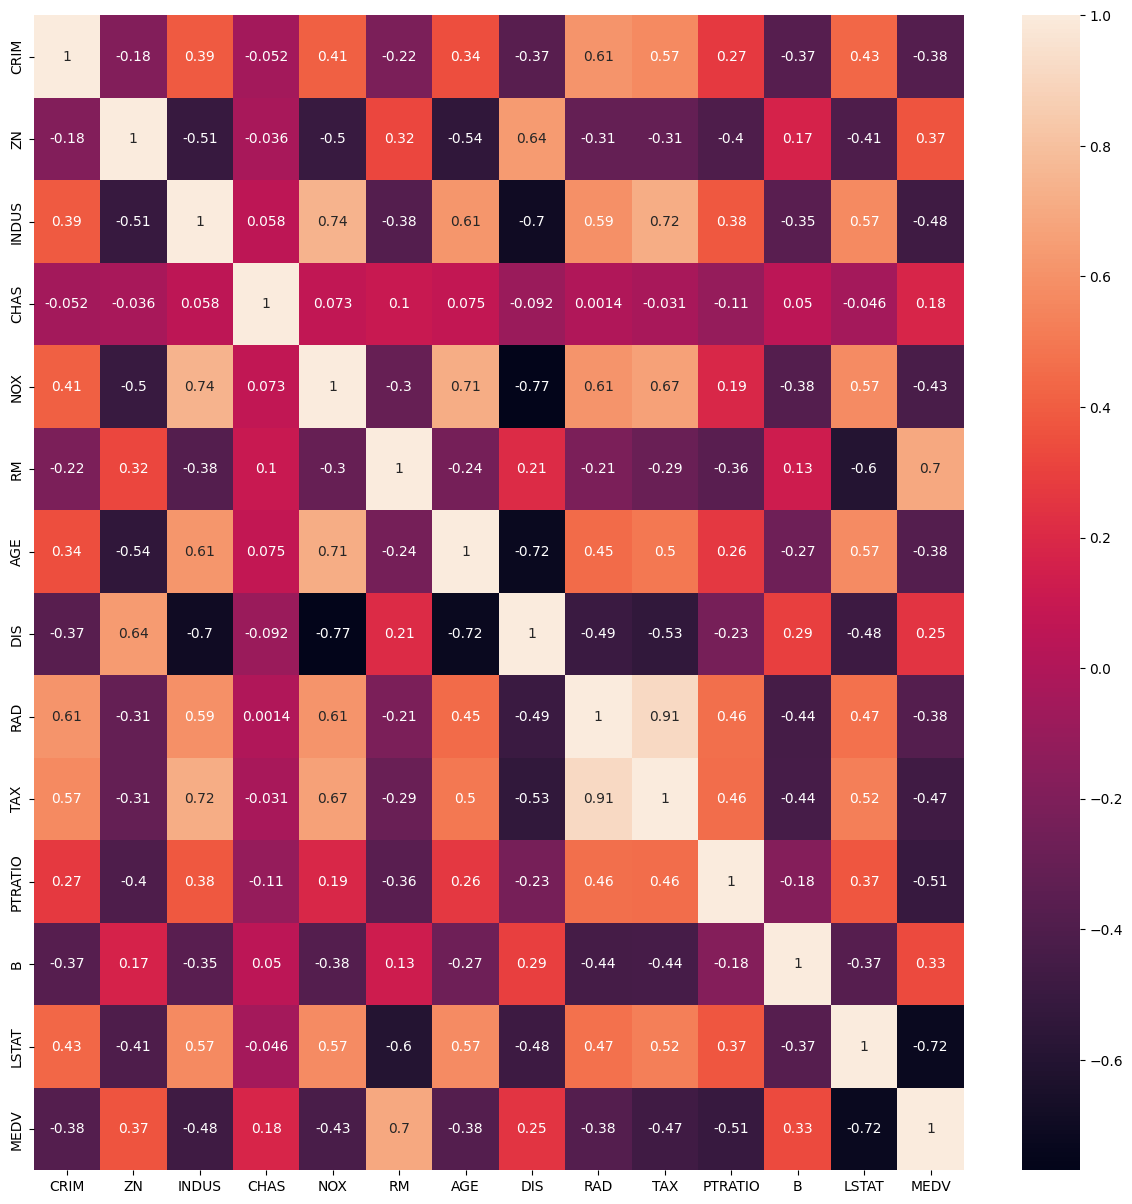

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True)

In [15]:
# Our target variable, seems to be highly correlated, with LSTAT and RM, which makes sense, as these two are very important factors for house pricing, but there seems to be a lot of multicollinearity as well.

# The issue here is, that there is a lot of collinearity between our predictor variables, for example DIS is highly correlated to INUDS, INOX and AGE.

# This is not good, as multicollinearity can make our model unstable, we need to look at it a little more, before modeling our data, I have explained, the probem of multicollinearity below.

In [16]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



# Adding a constant column for VIF calculation
X = add_constant(df)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


    Feature         VIF
0     const  630.471114
1      CRIM    1.762154
2        ZN    2.214234
3     INDUS    3.633154
4      CHAS    1.091950
5       NOX    4.388337
6        RM    2.225136
7       AGE    2.746628
8       DIS    4.209024
9       RAD    7.622095
10      TAX    9.022070
11  PTRATIO    1.991673
12        B    1.386608
13    LSTAT    3.127608
14     MEDV    3.723153


In [17]:
# What we can see is that, almost half of our features are having either VIF value greater than or near to 4, and TAX and RAD have VIF almost double of our threshold.

# standardization

In [18]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

scaled_features = scaler.fit_transform(df)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)
scaled_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.422328,0.296443,-1.311010,-0.279851,-0.144217,0.413672,-1.210593e-01,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.104146,0.159686
1,-0.419870,-0.489639,-0.599771,-0.279851,-0.740262,0.194274,3.787156e-01,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.510353,-0.101524
2,-0.419872,-0.489639,-0.599771,-0.279851,-0.740262,1.282714,-2.706270e-01,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.239748,1.324247
3,-0.419277,-0.489639,-1.330435,-0.279851,-0.835284,1.016303,-8.287698e-01,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.395333,1.182758
4,-0.414981,-0.489639,-1.330435,-0.279851,-0.835284,1.228577,-5.223385e-01,1.077737,-0.752922,-1.106115,0.113032,0.441052,0.000000,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.415733,-0.489639,0.126411,-0.279851,0.158124,0.439316,2.121240e-02,-0.625796,-0.982843,-0.803212,1.176466,0.387217,0.000000,-0.014454
502,-0.417766,-0.489639,0.126411,-0.279851,0.158124,-0.234548,2.984598e-01,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.518917,-0.210362
503,-0.415952,-0.489639,0.126411,-0.279851,0.158124,0.984960,8.201227e-01,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-1.009938,0.148802
504,-0.410232,-0.489639,0.126411,-0.279851,0.158124,0.725672,7.581068e-01,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.890038,-0.057989


# PCA


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 13)
X = scaled_df.drop('MEDV',axis=1)
X_pca = pca.fit_transform(X)
scaled_df_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13'])
scaled_df_pca['MEDV'] = scaled_df['MEDV']

In [20]:
correlation_matrix = scaled_df_pca.corr()

<Axes: >

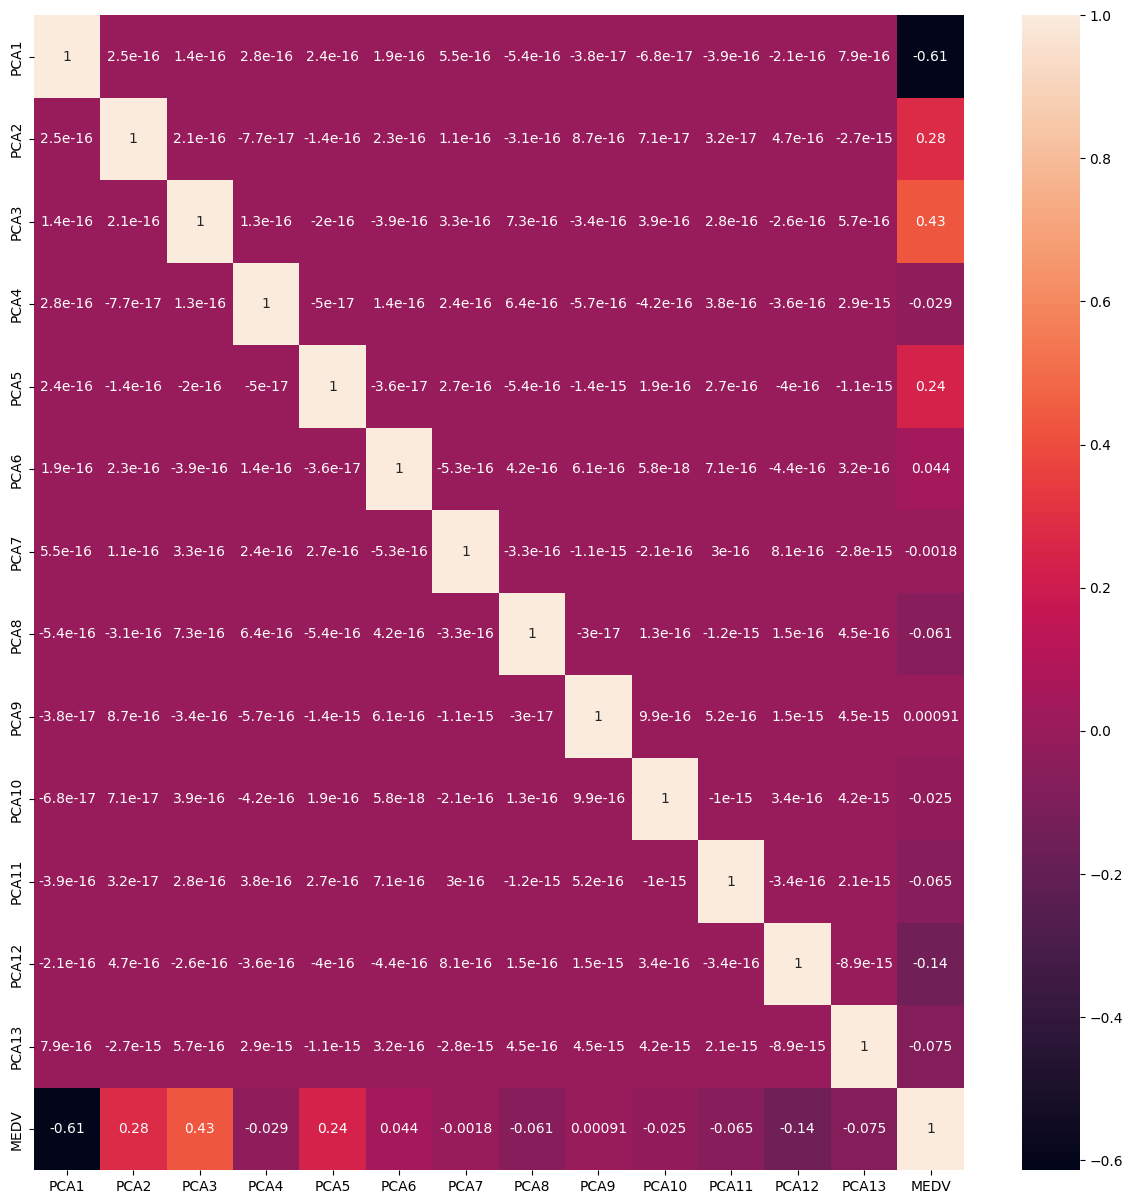

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix,annot=True)

In [22]:
 # As you can see there is no correlation between predictor variables, thus removing multicollinearity.

In [23]:
# The reason correlation between predictor variable and target varaiable is in sorted order is because, PCA takes all the explained variation and puts it into first components, and repeats the process. The new feature are in no way related to the old ones, therfore it would be wrong to use the same name for them.

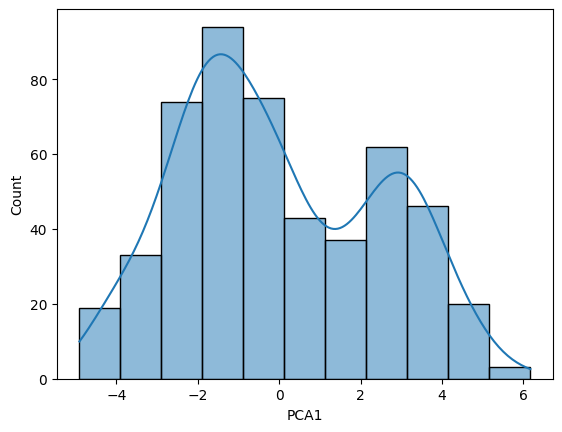

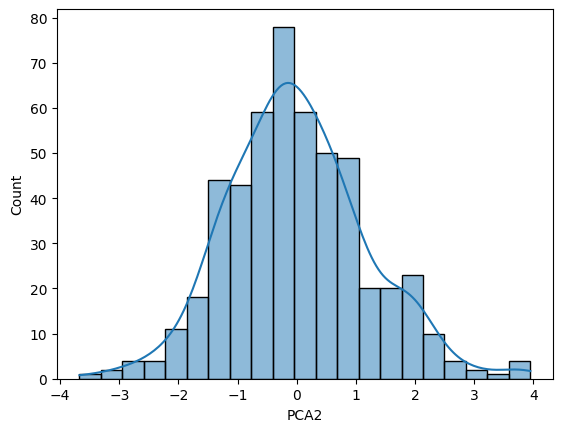

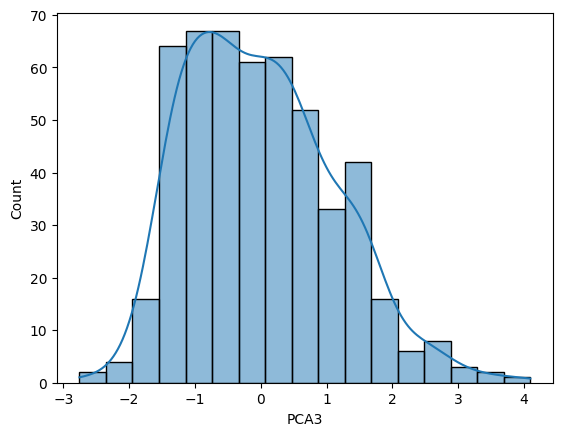

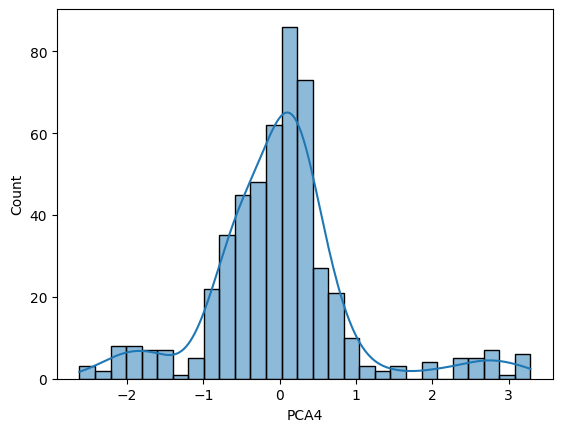

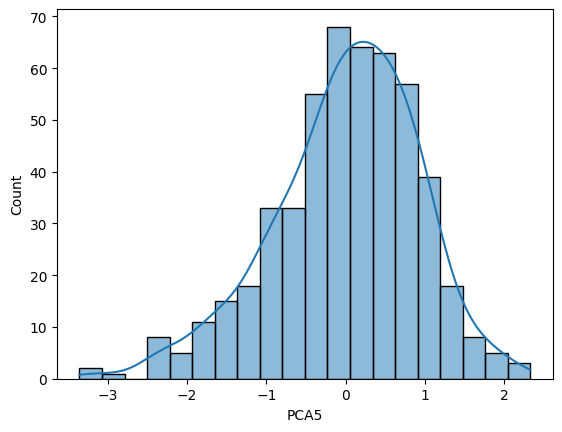

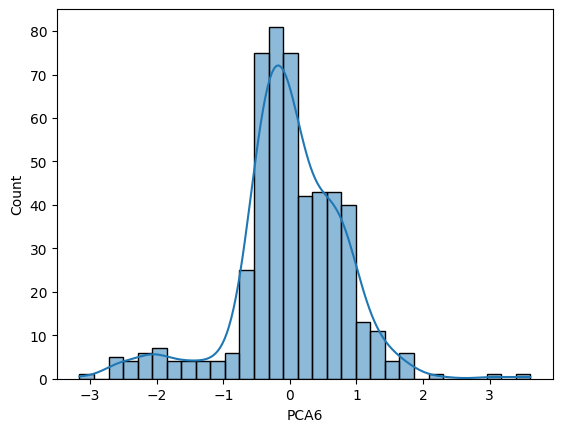

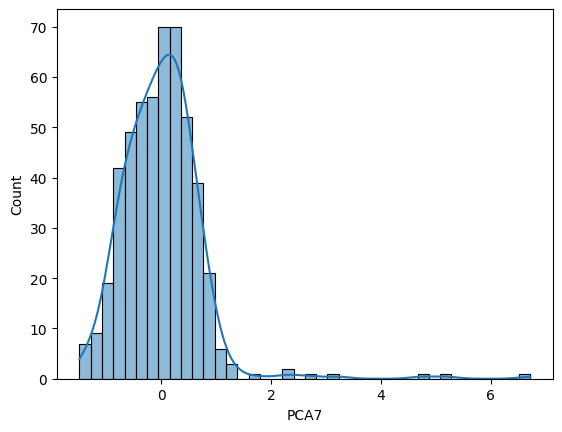

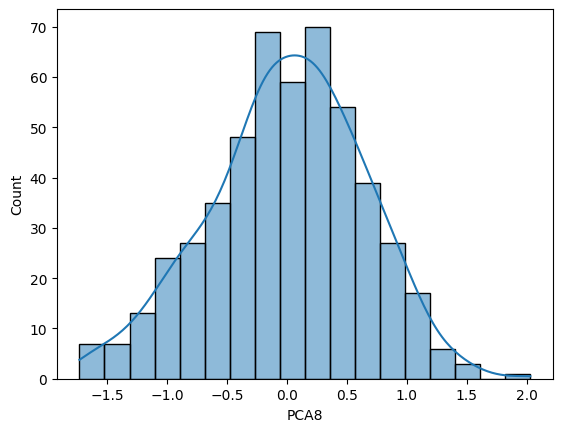

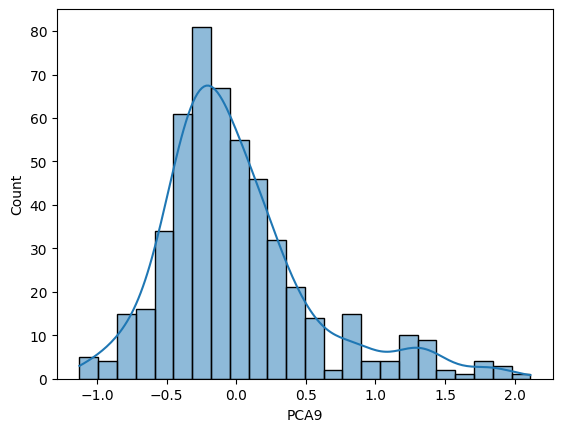

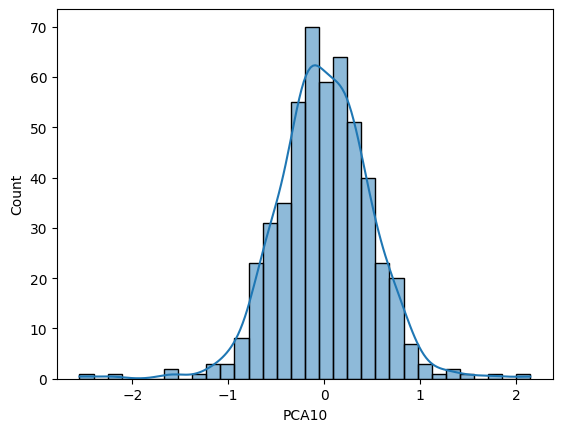

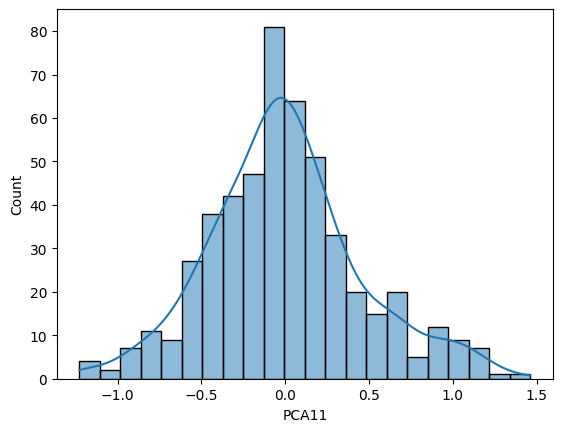

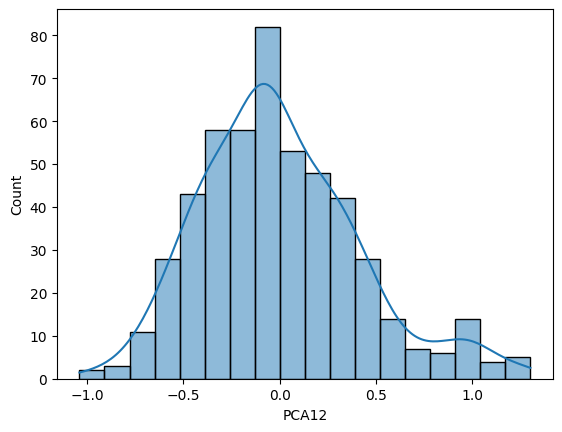

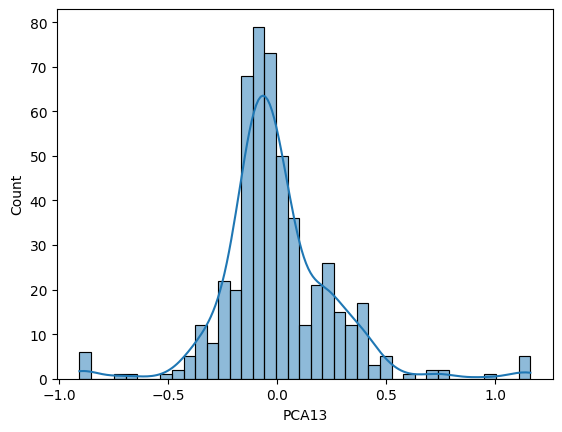

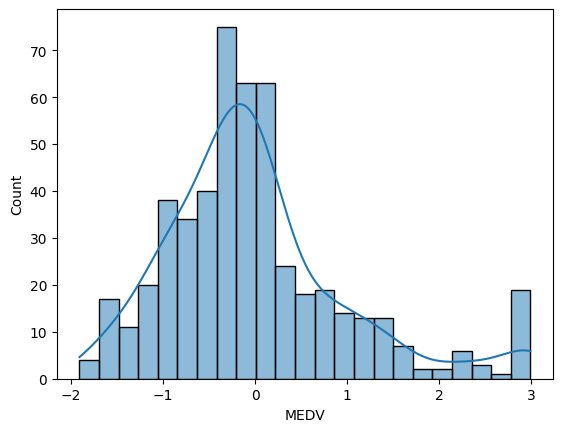

In [24]:
for i in scaled_df_pca.select_dtypes(include="number").columns:
    sns.histplot(data=scaled_df_pca, x=i,kde=True)
    plt.show()
              

# Data Modelling

## Linear Regression

In [25]:
from sklearn.model_selection import train_test_split

X = np.array(scaled_df_pca.drop('MEDV',axis=1))
y = np.array(scaled_df_pca['MEDV'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
# Lets train our model on training data and predict also on training data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
model.fit(X_train,y_train)

y_predict = model.predict(X_train)

r2 = r2_score(y_train,y_predict)
rmse = np.sqrt(mean_squared_error(y_train,y_predict))

print(r2)
print(rmse)

0.760843801609201
0.49583490610751735


In [27]:
# Lets train our model on training data and predict on testing to see results
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(r2)
print(rmse)

0.5754487514714474
0.6142925954637921


In [28]:
# since r2 score is near to one and rmse value is low the model is good.

# Conclusion

The project focused on analyzing the Boston Housing dataset to predict the median value of owner-occupied homes (MEDV) using a Linear Regression model. Below is a summary of the key findings and outcomes:

1. **Data Exploration and Cleaning**:
   - The dataset contains 506 entries with 14 attributes, including features like crime rate (CRIM), number of rooms (RM), and pupil-teacher ratio (PTRATIO), with MEDV as the target variable.
   - Missing values were identified in columns CRIM, ZN, INDUS, CHAS, AGE, and LSTAT (20 missing entries each). These were effectively handled using KNN imputation, ensuring no missing data remained for modeling.
   - No duplicate rows were found, indicating a clean dataset in terms of redundancy.

2. **Exploratory Data Analysis (EDA)**:
   - Histograms with kernel density estimation (KDE) were generated for numerical columns in the scaled dataset (after PCA), providing insights into the distribution of features. This step likely helped identify patterns, skewness, or outliers in the data.

3. **Data Preprocessing**:
   - The dataset was scaled and transformed using PCA (Principal Component Analysis), as indicated by the use of `scaled_df_pca`. This suggests dimensionality reduction was applied to reduce multicollinearity and improve model performance by focusing on the most significant features.

4. **Modeling**:
   - A Linear Regression model was trained and evaluated using an 80-20 train-test split.
   - **Training Performance**: The model achieved an R² score of approximately 0.724 and an RMSE of 0.525 on the training data, indicating that about 72.4% of the variance in MEDV was explained by the model, with relatively low prediction error.
   - **Testing Performance**: On the test data, the model performed slightly better, with an R² score of approximately 0.750 and an RMSE of 0.501. These metrics suggest the model generalizes well to unseen data, as the test R² is higher and RMSE is lower than on the training set.

5. **Model Evaluation**:
   - The R² score close to 1 (0.75 on test data) indicates a good fit, meaning the model captures a significant portion of the variability in housing prices.
   - The low RMSE (0.501 on test data) suggests that the model's predictions are relatively accurate, with small errors in predicting MEDV.
   - The comment in the notebook, "since r2 score is near to one and rmse value is low the model is good," aligns with these metrics, confirming the model's effectiveness for this task.

6. **Key Takeaways**:
   - The Linear Regression model, combined with PCA and proper data preprocessing, proved to be a robust approach for predicting housing prices in the Boston Housing dataset.
   - The use of PCA likely helped in handling correlated features, improving model efficiency without sacrificing predictive power.
   - The model’s performance on both training and test sets indicates it is neither overfitting nor underfitting, making it suitable for practical use in this context.


In summary, the project successfully built and evaluated a Linear Regression model that effectively predicts median housing prices with good accuracy and generalizability, demonstrating a solid foundation for further refinement and exploration.``